In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from examples.fep_control import fep_control
from combinators.model import active
from combinators.model import compose, foldable
from combinators.inference import importance
from combinators import utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
target = fep_control.MountainCarAgent(observation_dim=2, state_dim=2, batch_shape=(10,), trainable=False)
proposal = fep_control.RecognitionAgent(state_dim=2, action_dim=1, observation_dim=2, batch_shape=(10,),
                                        discrete_actions=False, name='MountainCarAgent', trainable=True,
                                        goal=target.goal)
agent = importance.propose(target, proposal)

In [5]:
episode = active.ActiveEpisode(agent, 'MountainCarContinuous-v0')

In [6]:
(control, prediction, t), graph, log_weight = episode(render=True)

In [7]:
xi, trained_params, elbos = active.active_variational(episode, 10, lr=1e-2, log_estimator=True, patience=None)

07/03/2019 16:37:04 Episode length: 570
07/03/2019 16:37:07 ELBO=-1.69627539e+04 per step at epoch 1
07/03/2019 16:37:10 Episode length: 468
07/03/2019 16:37:12 ELBO=-1.67760859e+04 per step at epoch 2
07/03/2019 16:37:18 Episode length: 898
07/03/2019 16:37:22 ELBO=-1.71271875e+04 per step at epoch 3
07/03/2019 16:37:24 Episode length: 298
07/03/2019 16:37:26 ELBO=-1.73551758e+04 per step at epoch 4
07/03/2019 16:37:30 Episode length: 614
07/03/2019 16:37:33 ELBO=-1.79162402e+04 per step at epoch 5
07/03/2019 16:37:34 Episode length: 98
07/03/2019 16:37:34 ELBO=-1.51636748e+04 per step at epoch 6
07/03/2019 16:37:41 Episode length: 947
07/03/2019 16:37:45 ELBO=-1.89236641e+04 per step at epoch 7
07/03/2019 16:37:48 Episode length: 433
07/03/2019 16:37:51 ELBO=-1.82438516e+04 per step at epoch 8
07/03/2019 16:37:52 Episode length: 217
07/03/2019 16:37:53 ELBO=-1.68871074e+04 per step at epoch 9
07/03/2019 16:37:54 Episode length: 180
07/03/2019 16:37:55 ELBO=-1.81757539e+04 per step at

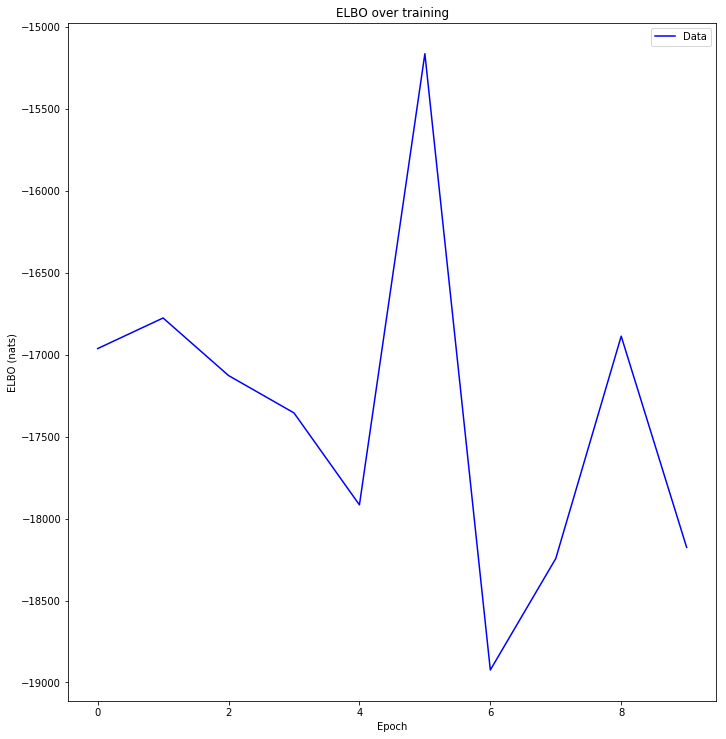

In [8]:
utils.plot_evidence_bounds(elbos[:, 0].cpu().detach().numpy())

In [9]:
(control, prediction, t), graph, log_weight = episode(render=True)

In [10]:
control

tensor([[ 1.0000],
        [ 1.0000],
        [ 0.5177],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 1.0000],
        [ 0.8663],
        [-0.8837]], grad_fn=<HardtanhBackward0>)

In [11]:
prediction

{'loc': tensor([[ 0.4264, -0.1480],
         [ 0.4545, -0.1626],
         [ 0.3764, -0.1253],
         [ 0.4396, -0.1551],
         [ 0.4385, -0.1524],
         [ 0.4040, -0.1383],
         [ 0.4131, -0.1432],
         [ 0.4068, -0.1364],
         [ 0.4034, -0.1393],
         [ 0.2904, -0.1042]], grad_fn=<SelectBackward>),
 'scale': tensor([[0.7421, 0.6446],
         [0.7412, 0.6370],
         [0.7489, 0.6651],
         [0.7420, 0.6414],
         [0.7387, 0.6374],
         [0.7458, 0.6545],
         [0.7458, 0.6525],
         [0.7405, 0.6470],
         [0.7479, 0.6575],
         [0.7512, 0.6927]], grad_fn=<SoftplusBackward>)}

In [12]:
t

563

In [13]:
log_weight

tensor([-11730117., -11454921., -11854945., -11696418., -11471729., -11428679.,
        -12080045., -11716064., -11397136., -11407000.],
       grad_fn=<AddBackward0>)

In [14]:
torch.save(agent, 'examples/fep_control/fep_mountain_car_agent.dat')